In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pandas_profiling
import collections
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Import dataset 
flight = pd.read_csv("flight_data.csv")

In [4]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          327346 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(5), int64(9), object(5)
memory usage: 48.8+ MB


In [5]:
# To pull top 5 data from data set
flight.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00


In [6]:
# Generate HTML report within Notebook
pandas_profiling.ProfileReport(flight)

Number of variables,19
Number of observations,336776
Total Missing (%),0.6%
Total size in memory,48.8 MiB
Average record size in memory,152.0 B
Numeric,9
Categorical,5
Boolean,0
Date,0
Text (Unique),0
Rejected,5


In [7]:
# Drop highly correlated columns to get more correct result 
flight.drop(['year','hour','minute','sched_dep_time', 'sched_arr_time'], axis=1, inplace=True)

In [8]:
# To check null values count 
flight.isnull().sum()

month           0
day             0
dep_time     8255
dep_delay    8255
arr_time     8713
arr_delay    9430
carrier         0
flight          0
tailnum      2512
origin          0
dest            0
air_time     9430
distance        0
time_hour       0
dtype: int64

# fill null values

In [6]:
# fill null values with mode
cols = ['dep_delay','arr_time','tailnum','arr_delay','dep_time']
flight[cols]=flight[cols].fillna(flight.mode().iloc[0])

In [7]:
# To check null values count 
flight.isnull().sum()

year                 0
month                0
day                  0
dep_time             0
sched_dep_time       0
dep_delay            0
arr_time             0
sched_arr_time       0
arr_delay            0
carrier              0
flight               0
tailnum              0
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

# Exploration ideas 

# Q1 - In Which Month flights are more demanding? (Peak time of flight)

In [8]:
# Create dataset to analyse season of flight
flight_numeric_data=flight[['month','flight']]
flight_numeric_data.head()

,month,flight
0,1,1545
1,1,1714
2,1,1141
3,1,725
4,1,461


In [9]:
np.round(flight_numeric_data.quantile(np.arange(0,1.05,0.05)),2) 
# floring and coupling (1 % to 99 %) approach for Outlier treatment 

,month,flight
0.00,1.0,1.0
0.05,1.0,91.0
0.10,2.0,209.0
0.15,2.0,329.0
0.20,3.0,421.0
0.25,4.0,553.0
0.30,4.0,706.0
0.35,5.0,901.0
0.40,5.0,1115.0
0.45,6.0,1262.0


In [10]:
for x in flight_numeric_data.columns:
    percentiles = flight_numeric_data[x].quantile([0.01,0.99]).values
    flight_numeric_data[x][flight_numeric_data[x] <= percentiles[0]] = percentiles[0]
    flight_numeric_data[x][flight_numeric_data[x] >= percentiles[1]] = percentiles[1]

(array([1, 2]), <a list of 2 Text xticklabel objects>)

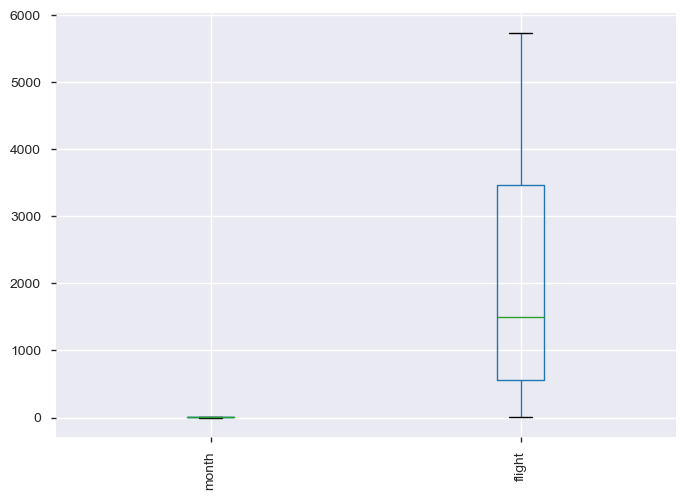

In [14]:
# boxplot for visualizations
flight_numeric_data.boxplot()
plt.xticks(rotation=90)
plt.show()

In [15]:
# Z Score based approach for Outlier treatment 
from scipy import stats
zscore = np.abs(stats.zscore(flight_numeric_data))
zscore
zscore_df = pd.DataFrame(zscore)
zscore_df.head()

array([[1.62500738, 0.26121757],
       [1.62500738, 0.15745581],
       [1.62500738, 0.50926345],
       ...,
       [0.71797462, 0.9151584 ],
       [0.71797462, 0.98330961],
       [0.71797462, 0.95813664]])

,0,1
0,1.625007,0.261218
1,1.625007,0.157456
2,1.625007,0.509263
3,1.625007,0.764677
4,1.625007,0.926766


In [16]:
flight_numeric_data_cleaned = flight_numeric_data[(zscore<3).all(axis=1)]

(array([1, 2]), <a list of 2 Text xticklabel objects>)

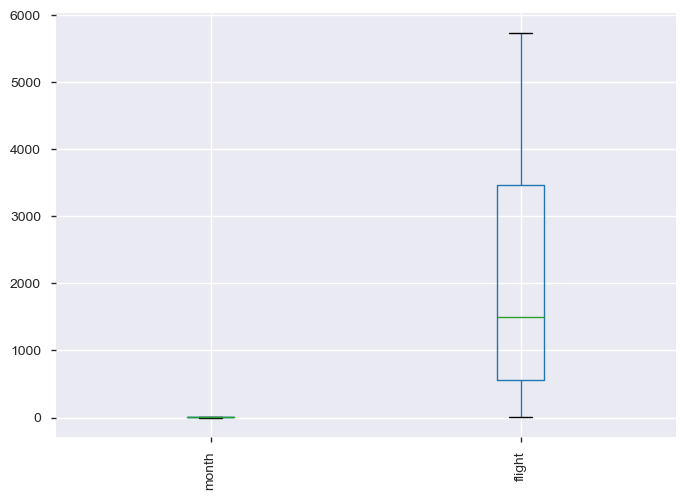

In [17]:
flight_numeric_data_cleaned.boxplot()
plt.xticks(rotation=90)
plt.show()

In [18]:
q1 = flight_numeric_data_cleaned.quantile(0.25)
q3 = flight_numeric_data_cleaned.quantile(0.75)
iqr = q3-q1
iqr
# iqr based approach for Outlier treatment 

month        6.0
flight    2912.0
dtype: float64

In [19]:
flight_numeric_cleaned_data = flight_numeric_data_cleaned [~((flight_numeric_data_cleaned<(q1-1.5*iqr))|(flight_numeric_data_cleaned>(q3+1.5*iqr))).any(axis=1)]
flight_numeric_cleaned_data.describe()

,month,flight
count,336776.000000,336776.000000
mean,6.548510,1970.453159
std,3.414457,1628.733409
min,1.000000,11.000000
25%,4.000000,553.000000
50%,7.000000,1496.000000
75%,10.000000,3465.000000
max,12.000000,5736.000000


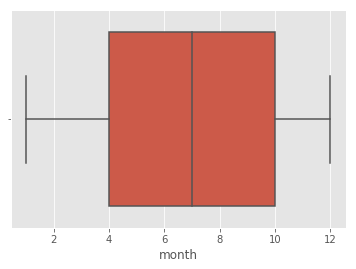

In [13]:
# boxplot for month 
from matplotlib import style
style.use('ggplot')
sns.boxplot(x='month',data=flight_numeric_data)

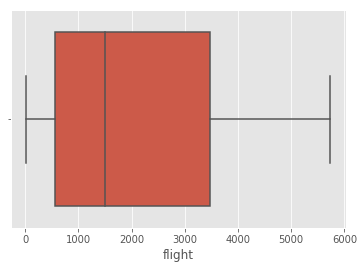

In [14]:
# boxplot for flight 
from matplotlib import style
style.use('ggplot')
sns.boxplot(x='flight',data=flight_numeric_data)

In [37]:
group_1 = flight_numeric_cleaned_data['flight'].groupby(flight_numeric_cleaned_data['month'])
group_2 = group_1.count()
group_3 = group_2.sort_values(ascending=False)
group_3

month
7     29425
8     29327
10    28889
3     28834
5     28796
4     28330
6     28243
12    28135
9     27574
11    27268
1     27004
2     24951
Name: flight, dtype: int64

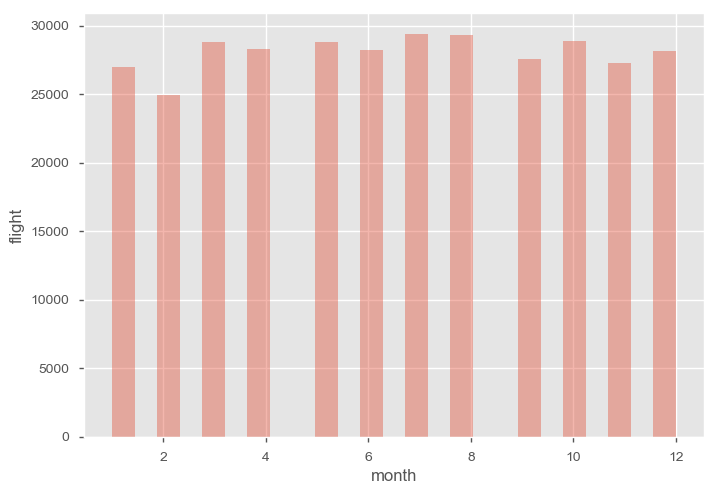

In [22]:
sns.distplot(flight_numeric_cleaned_data['month'], bins=25, kde=False)
plt.ylabel('flight')
plt.show();
# ANS- July month  

# ANS- July month 

# Q2 - Which Airline maximum Departure delays. (Number of times)

carrier
UA    58665
B6    54635
EV    54173
DL    48110
AA    32729
MQ    26397
US    20536
9E    18460
WN    12275
VX     5162
FL     3260
AS      714
F9      685
YV      601
HA      342
OO       32
Name: dep_delay, dtype: int64

Text(0, 0.5, 'No. of times')

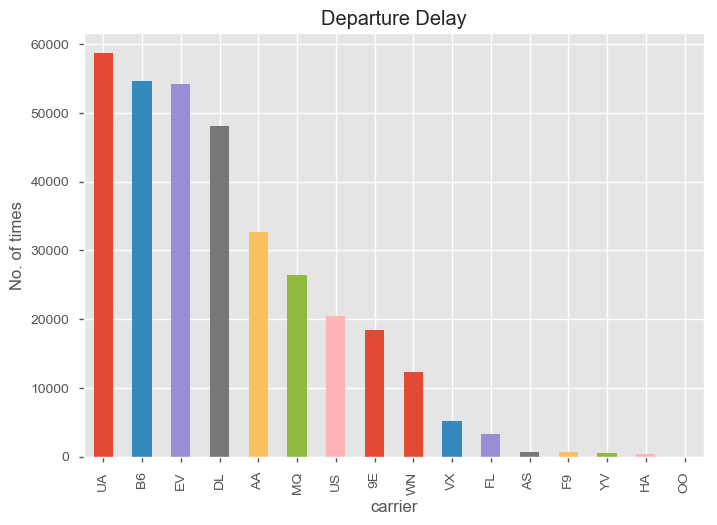

In [23]:
group_1 = flight['dep_delay'].groupby(flight['carrier'])
group_2 = group_1.count()
group_3 = group_2.sort_values(ascending=False)
group_3
group_3.plot(kind ='bar', title = 'Departure Delay')
plt.ylabel('No. of times')
plt.show()
# ANS - UA Airline.

# ANS - UA Airline.

# Q3 - In which month maximum Departure delays occured.

month
7     29425
8     29327
10    28889
3     28834
5     28796
4     28330
6     28243
12    28135
9     27574
11    27268
1     27004
2     24951
Name: dep_delay, dtype: int64

Text(0, 0.5, 'No. of times')

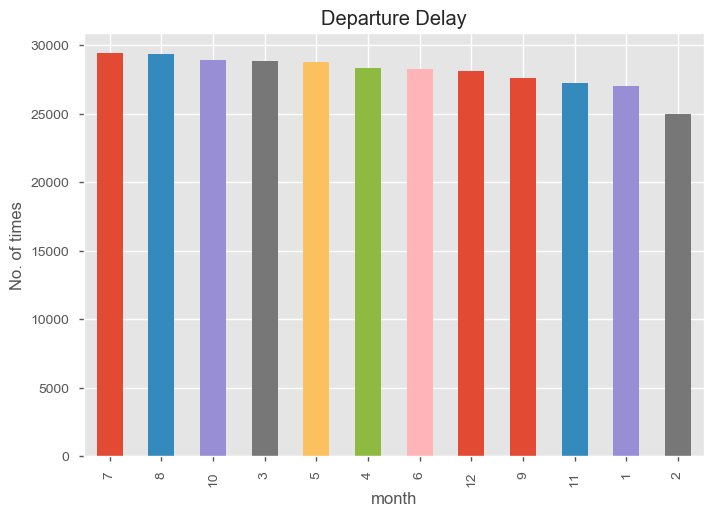

In [24]:
group_1 = flight['dep_delay'].groupby(flight['month'])
group_2 = group_1.count()
group_3 = group_2.sort_values(ascending=False)
group_3.plot(kind ='bar', title = 'Departure Delay')
group_3
plt.ylabel('No. of times')
plt.show()
# Ans- July Month

# Ans- July Month

# Q4 -Best airports in terms of time departure %

In [51]:
flight["Dep_Status"] = ""
flight.loc[flight.dep_delay < 0, "Dep_Status"] = "Early"
flight.loc[flight.dep_delay == 0, "Dep_Status"] = "On_Time"
flight.loc[flight.dep_delay > 0, "Dep_Status"] = "Delayed"
flight_dep = flight.groupby(["origin","Dep_Status"])["Dep_Status"].agg("count").unstack("Dep_Status")
flight_dep['Total'] = flight_dep['Delayed'] + flight_dep['Early'] + flight_dep['On_Time'] 

In [55]:
flight_dep["Delayed%"] = (flight_dep.iloc[:,0]/flight_dep.iloc[0:,3]*100).round(2)
flight_dep["On_Time%"] = (flight_dep.iloc[:,2]/flight_dep.iloc[0:,3]*100).round(2)
flight_dep["Early%"] = (flight_dep.iloc[:,1]/flight_dep.iloc[0:,3]*100).round(2)
flight_dep

Dep_Status,Delayed,Early,On_Time,Total,Delayed%,On_Time%,Early%
origin,,,,,,,
EWR,52711,62539,5585,120835,43.62,4.62,51.76
JFK,42031,63009,6239,111279,37.77,5.61,56.62
LGA,33690,66282,4690,104662,32.19,4.48,63.33


Text(0, 0.5, '%')

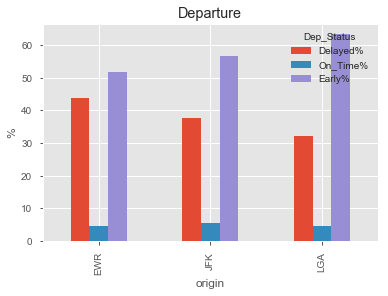

In [56]:
flight_dep[["Delayed%","On_Time%","Early%"]].plot(kind ="bar", title = "Departure")
plt.ylabel("%")
plt.show()
# ANS- LGA is the Best airports in terms of time departure %

# ANS- LGA is the Best airports in terms of time departure %

# Q5- On time arrival % analysis

In [42]:
flight["Arr_Status"] = ""
flight.loc[flight.arr_delay < 0, "Arr_Status"] = "Early"
flight.loc[flight.arr_delay == 0, "Arr_Status"] = "On_Time"
flight.loc[flight.arr_delay > 0, "Arr_Status"] = "Delayed"
flight_arr = flight.groupby(["dest","Arr_Status"])["Arr_Status"].agg("count").unstack("Arr_Status")
flight_arr.sample(10)

Arr_Status,Delayed,Early,On_Time
dest,,,
SJC,124.0,199.0,6.0
MDW,1874.0,2161.0,78.0
STL,1819.0,2445.0,75.0
RIC,1196.0,1223.0,35.0
GRR,378.0,369.0,18.0
DSM,260.0,303.0,6.0
DAY,632.0,870.0,23.0
JAX,1233.0,1457.0,30.0
PBI,2870.0,3575.0,109.0


In [81]:
flight_arr["Total"] = flight_arr["Delayed"] + flight_arr["Early"] + flight_arr["On_Time"]     
flight_arr["Delayed%"] = (flight_arr.iloc[:,0]/flight_arr.iloc[0:,3]*100).round(2)
flight_arr["On_Time%"] = (flight_arr.iloc[:,2]/flight_arr.iloc[0:,3]*100).round(2)
flight_arr["Early%"] = (flight_arr.iloc[:,1]/flight_arr.iloc[0:,3]*100).round(2)
flight_arrival = flight_arr.sort_values(by = ["On_Time%"], ascending = False)
flight_arrival_data = flight_arrival.head()
flight_arrival_data

Arr_Status,Delayed,Early,On_Time,Total,Delayed%,On_Time%,Early%
dest,,,,,,,
SBN,4.0,5.0,1.0,10.0,40.00,10.00,50.00
EYW,10.0,6.0,1.0,17.0,58.82,5.88,35.29
JAC,17.0,7.0,1.0,25.0,68.00,4.00,28.00
PSE,178.0,173.0,14.0,365.0,48.77,3.84,47.40
AVL,119.0,148.0,8.0,275.0,43.27,2.91,53.82


Text(0, 0.5, '%')

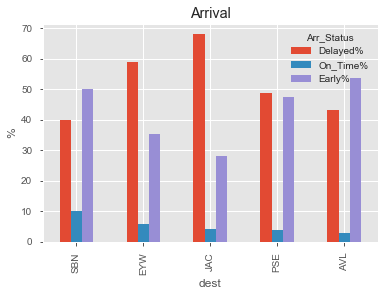

In [82]:
flight_arrival_data[["Delayed%","On_Time%","Early%"]].plot(kind ="bar", title = "Arrival")
plt.ylabel("%")
plt.show()
# ANS- JAC is the Best airports in terms of on time arrival %

# ANS- JAC is the Best airports in terms of on time arrival %

# Q6 -Aircraft speed analysis. 

In [10]:
flight.dtypes
flight['distance']= flight['distance'].astype(float)
flight['flight']= flight['flight'].astype(str)
flight.dtypes
# Converting air_time into float and flight into string dType

month          int64
day            int64
dep_time     float64
dep_delay    float64
arr_time     float64
arr_delay    float64
carrier       object
flight         int64
tailnum       object
origin        object
dest          object
air_time     float64
distance       int64
time_hour     object
dtype: object

month          int64
day            int64
dep_time     float64
dep_delay    float64
arr_time     float64
arr_delay    float64
carrier       object
flight        object
tailnum       object
origin        object
dest          object
air_time     float64
distance     float64
time_hour     object
dtype: object

In [11]:
flight['carrier_flight'] = flight['carrier'] + "_"+ flight['flight']
# to identify correct aircraft 

In [12]:
flight.sample(3)

,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,time_hour,carrier_flight
108746,12,29,722.0,-2.0,1017.0,-7.0,UA,643,N805UA,EWR,TPA,163.0,997.0,29-12-2013 07:00,UA_643
231922,6,11,1452.0,53.0,1639.0,45.0,MQ,4577,N725MQ,LGA,CLT,85.0,544.0,11-06-2013 13:00,MQ_4577
145048,3,10,1557.0,-2.0,1823.0,-28.0,UA,1262,N37287,EWR,MCO,124.0,937.0,10-03-2013 15:00,UA_1262


In [13]:
flight.isnull().sum()
# To calculate aircraft speed, we are ignoring 'air_time' null values

month                0
day                  0
dep_time             0
dep_delay            0
arr_time             0
arr_delay            0
carrier              0
flight               0
tailnum              0
origin               0
dest                 0
air_time          9430
distance             0
time_hour            0
carrier_flight       0
dtype: int64

In [21]:
flight['speed_in_mph'] = flight.distance/(flight.air_time/60)
x = ['speed_in_mph', 'carrier_flight']
speed = round(flight.sort_values('speed_in_mph',ascending = False)[x]).head()
speed
# ANS-  DL_1499 is the top speed aircraft

,speed_in_mph,carrier_flight
216447,703.0,DL_1499
251999,650.0,EV_4667
205388,648.0,EV_4292
157516,641.0,EV_3805
10223,591.0,DL_1902


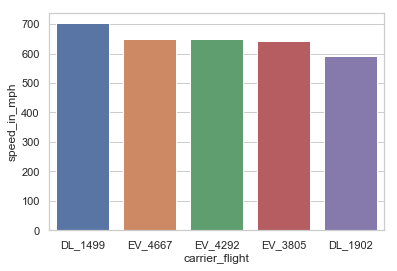

In [18]:
#sns.set(style="whitegrid")
ax = sns.barplot(x="carrier_flight", y="speed_in_mph", data=speed)

# ANS- DL_1499 

# Q7- Maximum number of flights headed to some particular destination.

In [12]:
destinations = flight.groupby('dest')['dest'].count().sort_values(ascending = False).head(5)
destinations
# Ans- ORD

dest
ORD    17283
ATL    17215
LAX    16174
BOS    15508
MCO    14082
Name: dest, dtype: int64

Text(0, 0.5, 'destination')

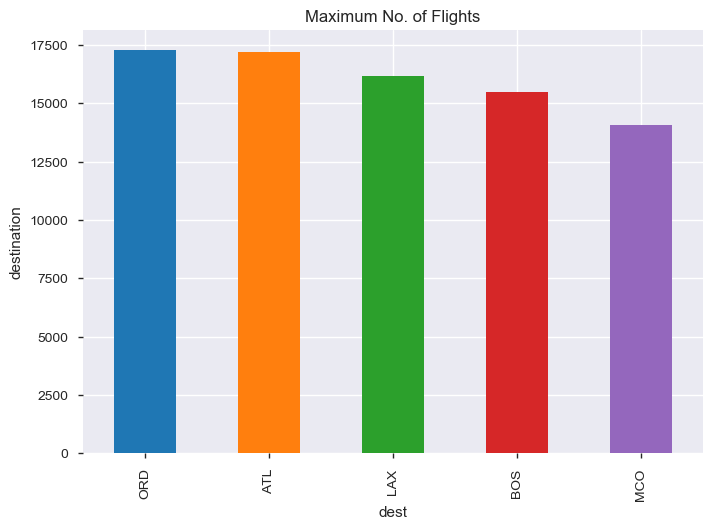

In [13]:
destinations.plot(kind ="bar", title = "Maximum No. of Flights")
plt.ylabel("destination")
plt.show()

# ANS- ORD

# Q8-  shortest path

In [16]:
flight['path'] = flight['origin'] + '_'+ flight['dest']

In [17]:
sh_path_1 = flight['distance'].groupby(flight['path']).sum()
sh_path_2 = sh_path_1.sort_values(ascending = True)
path = sh_path_2.head(10)
# ANS- EWR_LGA have shortest path, which is 17 miles

Text(0, 0.5, 'distance')

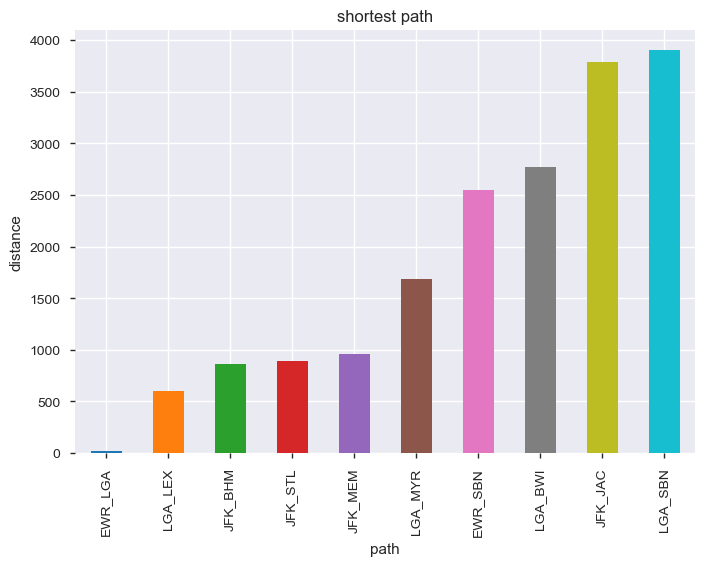

In [18]:
path.plot(kind ="bar", title = "shortest path")
plt.ylabel("distance")
plt.show()

# ANS- EWR_LGA have shortest path, which is 17 miles